# Field of view inspection of the development dataset

The aim of this notebook is to demonstrate the importance of field of view and how can it systematically bias your data classification results.

In [ ]:
import pandas as pd
from nilearn import datasets, image, plotting
from nilearn.masking import compute_epi_mask

In [25]:
sourcedata_dir = "../data/external"
development_dataset = datasets.fetch_development_fmri(data_dir=sourcedata_dir)
mni_mask = datasets.fetch_icbm152_2009()['mask']
participants = pd.DataFrame(development_dataset.phenotypic)  # the data will not be in the sequence of the subject ID

[get_dataset_dir] Dataset found in ../data/external/development_fmri
[get_dataset_dir] Dataset found in ../data/external/development_fmri/development_fmri
[get_dataset_dir] Dataset found in ../data/external/development_fmri/development_fmri
[get_dataset_dir] Dataset found in /home/hwang/nilearn_data/icbm152_2009


In [26]:
func_adult = [development_dataset.func[i] for i in participants.index[participants['Child_Adult'] == 'adult'].tolist()]
func_child = [development_dataset.func[i] for i in participants.index[participants['Child_Adult'] == 'child'].tolist()]

In [42]:
def compute_epi_percentage_coverage(func_files):
    """Compute the percentage of voxels covered by the functional images."""
    # for each functional image, compute a biniary mask
    masks = [compute_epi_mask(func_file) for func_file in func_files]
    # stack the masks to create a 3D mask
    stacked_mask = image.mean_img(masks, copy_header=True)
    stacked_mask_percent = image.math_img("img*100", img=stacked_mask)  # convert to percentage
    return stacked_mask_percent
func_child_coverage = compute_epi_percentage_coverage(func_child)
func_adult_coverage = compute_epi_percentage_coverage(func_adult)


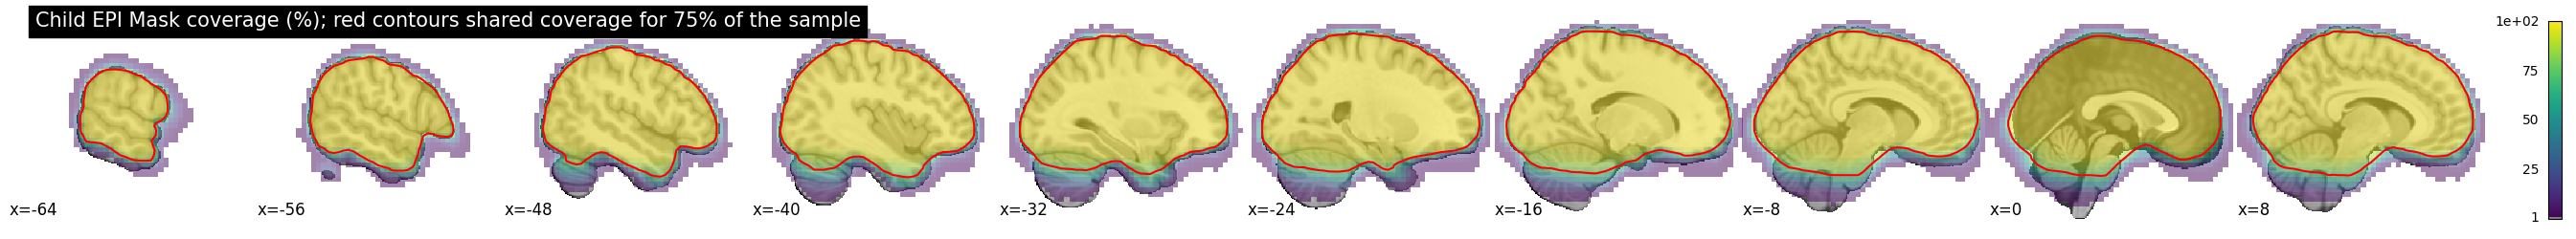

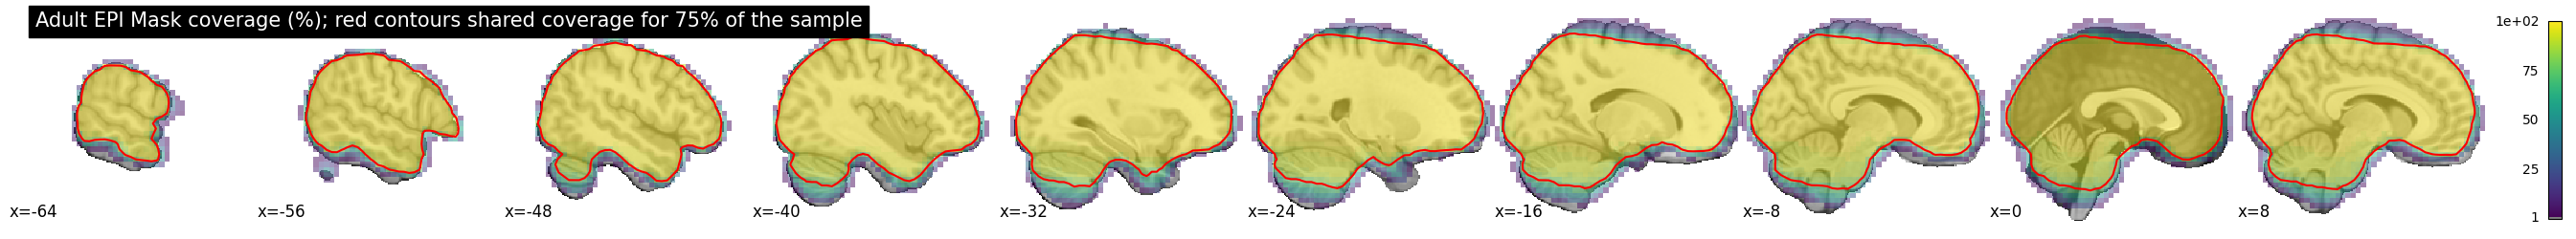

In [45]:
plotting.plot_img(
    func_child_coverage,     
    title='Child EPI Mask coverage (%); red contours shared coverage for 75% of the sample', 
    vmin=0, 
    vmax=100,
    threshold=1, 
    bg_img=datasets.MNI152_FILE_PATH, 
    display_mode='x', 
    cut_coords=10, 
    colorbar=True,
    alpha=0.5
).add_contours(func_child_coverage, 
               levels=[75], 
               colors='red',)
plotting.plot_img(
    func_adult_coverage, 
    title='Adult EPI Mask coverage (%); red contours shared coverage for 75% of the sample', 
    vmin=0, 
    vmax=100, 
    threshold=1, 
    bg_img=datasets.MNI152_FILE_PATH, 
    display_mode='x', 
    cut_coords=10, 
    colorbar=True,
    alpha=0.5
).add_contours(func_adult_coverage, 
               levels=[75], 
               colors='red',)